# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [2]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [3]:
X=torch.ones(3,3)
Y=torch.ones(3,3)

# 행으로 병합 코드
result1 = torch.cat((X, Y), dim=0)

# 열로 병합 코드
result2 = torch.cat((X, Y), dim=1)

### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [4]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 7.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 10.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 8.8 MB/s eta 0:00:0000:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.2
    Uninstalling pandas-1.5.2:
      Successfully uninstalled pandas-1.5.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip 

In [5]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [6]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [7]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.1939, -0.6342]) 
label: tensor([7.0302])


In [9]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
     ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [10]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-1.1611,  1.5418],
        [-0.7098, -1.4189],
        [-0.4354,  0.2025],
        [-1.4651, -0.3517],
        [-0.2933, -0.2790],
        [ 0.1714, -1.0184],
        [ 0.6960,  0.6658],
        [ 0.9933, -1.3924],
        [-0.0662,  1.1640],
        [ 1.6354,  0.5937],
        [-0.0452, -1.0366],
        [ 1.1657, -0.2685],
        [-1.7141, -0.6193],
        [-2.2297,  1.5175],
        [ 0.0284,  0.2187],
        [ 1.5733, -1.0639],
        [-0.8703,  1.5739],
        [-0.0244, -0.5405],
        [ 2.0032,  0.5103],
        [-0.6814, -0.2102]]) 
 tensor([[-0.2989],
        [ 5.4962],
        [ 3.8897],
        [ 1.6365],
        [ 5.0251],
        [ 7.5313],
        [ 6.5793],
        [10.5570],
        [ 3.5489],
        [ 9.5156],
        [ 6.9183],
        [ 9.4071],
        [ 1.2904],
        [-3.4522],
        [ 5.2416],
        [11.8295],
        [ 0.5349],
        [ 6.2440],
        [10.7569],
        [ 3.7637]])


In [31]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([])#원하는 실수를 넣어주세요

In [32]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b
    ###lr func 코드 완성하기

In [36]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y) ** 2) ###loss function 직접 짜보기

In [37]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        for param in params:
          if param.grad is not None:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [39]:

lr = 0.05 ###직접 설정
num_epochs = 20 ###직접 설정
net = linreg###위에서 가져오기
loss = squared_loss###위에서 가져오기

w_seq=[]
loss_seq=[]


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b],lr, batch_size)

    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')
        w_seq.append(w.tolist())
        loss_seq.append(train_l.mean())

epoch 1, loss nan
epoch 2, loss nan
epoch 3, loss nan
epoch 4, loss nan
epoch 5, loss nan
epoch 6, loss nan
epoch 7, loss nan
epoch 8, loss nan
epoch 9, loss nan
epoch 10, loss nan
epoch 11, loss nan
epoch 12, loss nan
epoch 13, loss nan
epoch 14, loss nan
epoch 15, loss nan
epoch 16, loss nan
epoch 17, loss nan
epoch 18, loss nan
epoch 19, loss nan
epoch 20, loss nan


In [22]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 2.9977, -1.5038], grad_fn=<SubBackward0>)
error in estimating b: tensor([])


\+ cost graph 그리기 (x축 w, y축 loss)

In [23]:

w_seq

[[[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169893]],
 [[0.0022686049342155457], [0.0038480714429169

Text(0, 0.5, 'Loss')

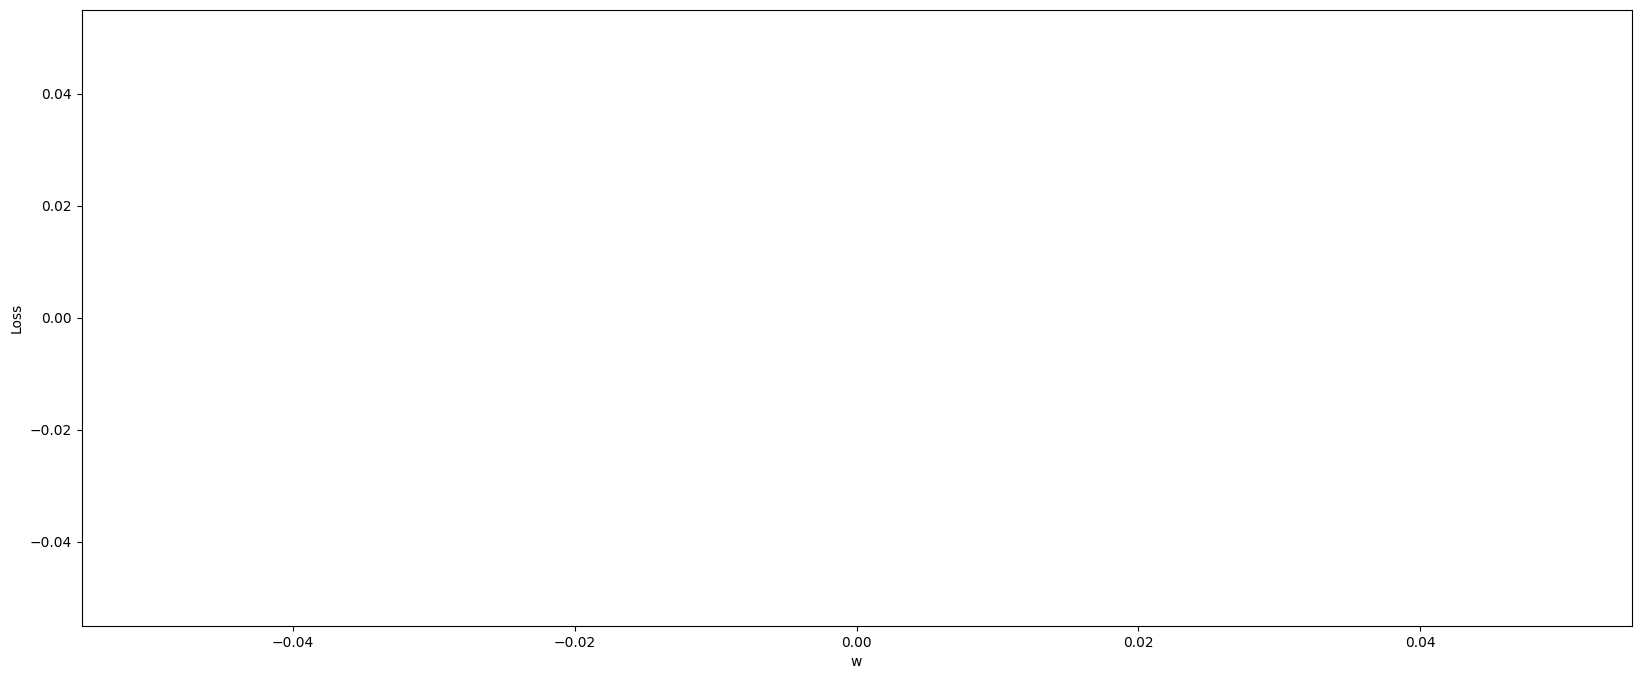

In [40]:

import matplotlib.pyplot as plt

y_result = [w_seq[w][0] for w in range(len(w_seq))]

plt.figure(figsize=(20,8))

plt.subplot(1,1,1)
plt.plot(y_result, loss_seq)
plt.xlabel('w')
plt.ylabel('Loss')

### Concise Implementation of Linear Regression
- API 사용해보기

In [41]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [42]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [43]:
next(iter(data_iter))

[tensor([[ 0.8303,  1.5348],
         [ 0.7854, -1.0463],
         [ 0.9131, -0.4560],
         [-1.4479,  0.4896],
         [-0.8902, -0.9010],
         [ 0.5291, -1.1735],
         [ 1.1558, -0.2173],
         [-1.3996, -0.0604],
         [ 0.2813,  0.3609],
         [ 0.1295, -0.7203],
         [-0.1408, -0.8955],
         [-0.1672, -0.8791],
         [ 0.3072,  0.7258],
         [ 1.3277, -1.4822],
         [-0.4711,  0.0246],
         [ 0.0147,  0.8520],
         [ 0.0780, -1.2462],
         [-0.2069,  0.8130],
         [-0.1284, -1.2305],
         [-1.0553,  0.6457]]),
 tensor([[ 5.6868],
         [ 9.4197],
         [ 8.9134],
         [ 0.4265],
         [ 4.1678],
         [ 8.8442],
         [ 9.2927],
         [ 1.3709],
         [ 5.7962],
         [ 6.9710],
         [ 6.4093],
         [ 6.3217],
         [ 5.3265],
         [11.6707],
         [ 4.0499],
         [ 4.2656],
         [ 7.6197],
         [ 3.6485],
         [ 6.9384],
         [ 1.3690]])]

In [44]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

In [45]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [47]:
loss = nn.MSELoss()

In [48]:
trainer = torch.optim.Adam(net.parameters(), lr=0.01) 

In [50]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 26.654081
epoch 2, loss 16.237013
epoch 3, loss 9.564658


In [51]:
w = net[0].weight.data###학습결과 w 구하는 식
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b =  net[0].bias.data###학습결과 b 구하는 식
print('error in estimating b:', true_b - b)

SyntaxError: invalid syntax (3550648842.py, line 1)